# Import Libraries and Datasets

In [242]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

In [243]:
data=pd.read_csv(r"C:\Users\Rohan Ekbote\OneDrive\Desktop\DS Proj\t3\bank\bankmarketing.csv")

In [244]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [245]:
data.shape

(11162, 17)

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [247]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [248]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# DATA VISUALIZATION

# Histogram 

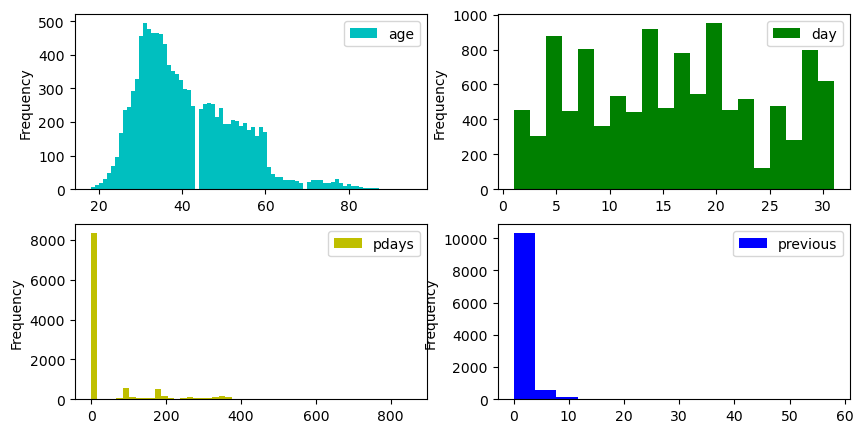

In [249]:
fig,axes = plt.subplots(nrows = 2,ncols = 2,figsize = (10,5))
data.plot(kind = "hist",y = "age",bins = 80,color = "c",ax = axes[0][0])
data.plot(kind = "hist",y = "day",bins = 20,color = "g",ax = axes[0][1])
data.plot(kind = "hist",y = "pdays",bins = 50,color = "y",ax = axes[1][0])
data.plot(kind = "hist",y = "previous",bins = 15,color = "b",ax = axes[1][1])
plt.show()

# HEATMAP

<Axes: >

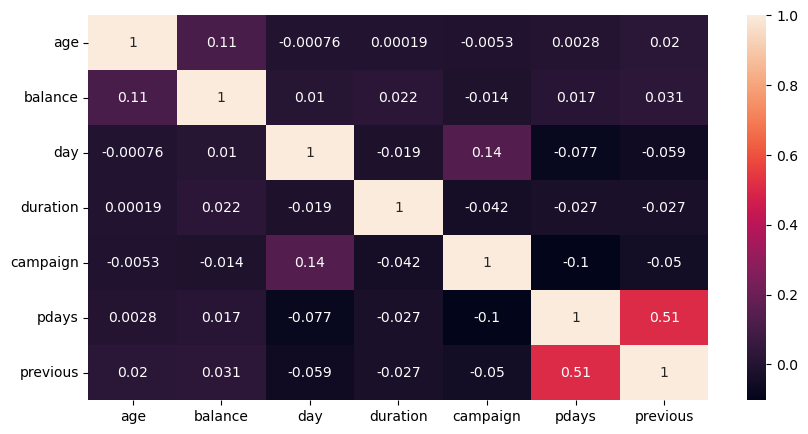

In [250]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(),annot = True)

In [251]:
data.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

# Job Status of Client

<Axes: title={'center': 'Job Status'}, xlabel='job', ylabel='count'>

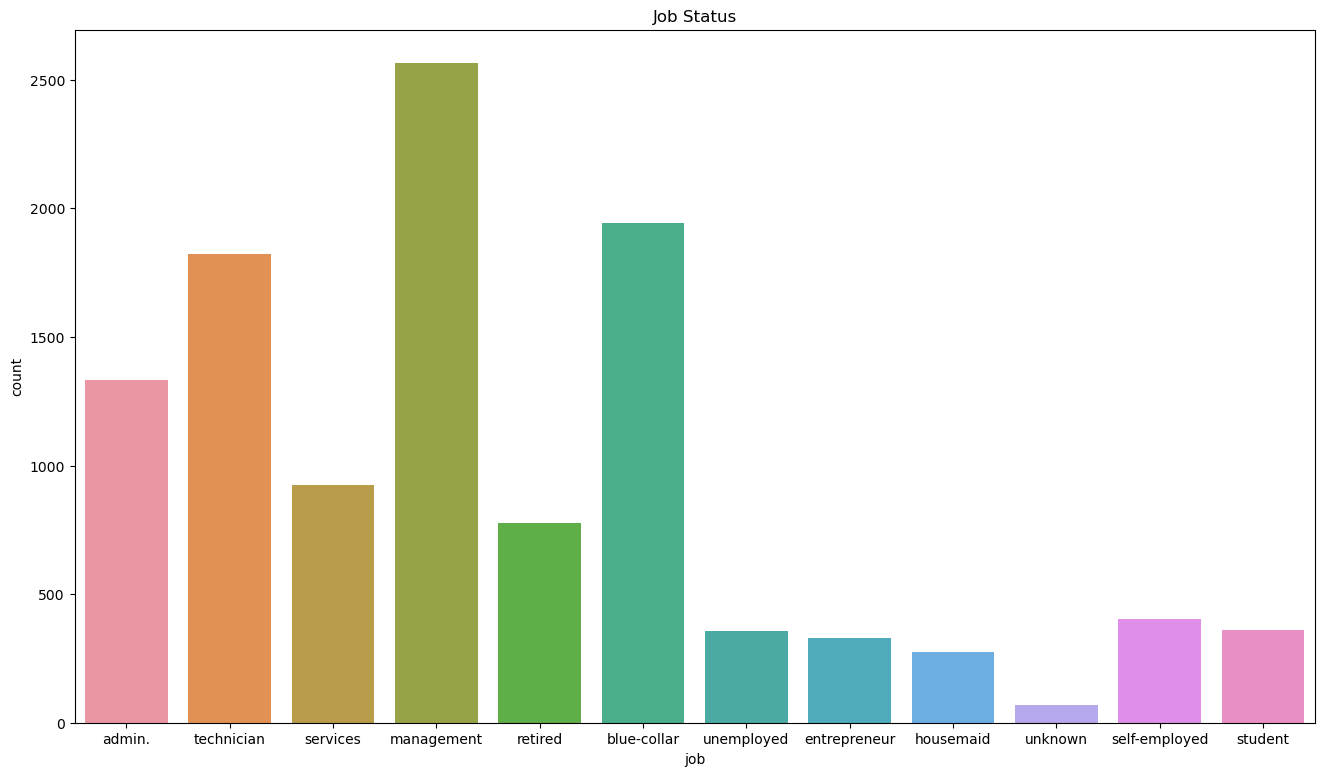

In [252]:
plt.figure(figsize = (16,9))
plt.title("Job Status")
sns.countplot(x='job',data=data)

# Marital Status of Client

Text(0.5, 1.0, 'Marital Status')

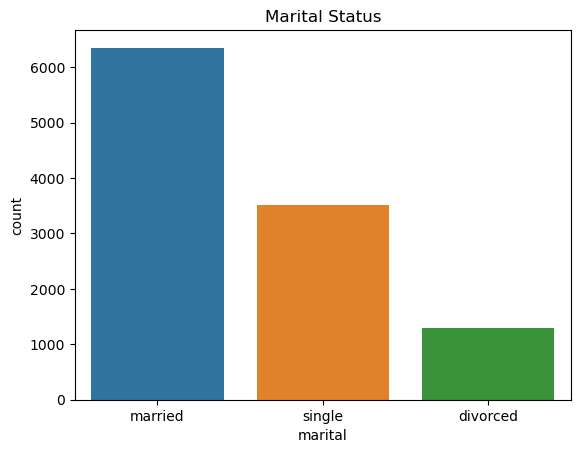

In [253]:
sns.countplot(x='marital',data=data)
plt.title("Marital Status")

In [254]:
data.education.value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

# Education Status of Client

Text(0.5, 1.0, 'Education Status')

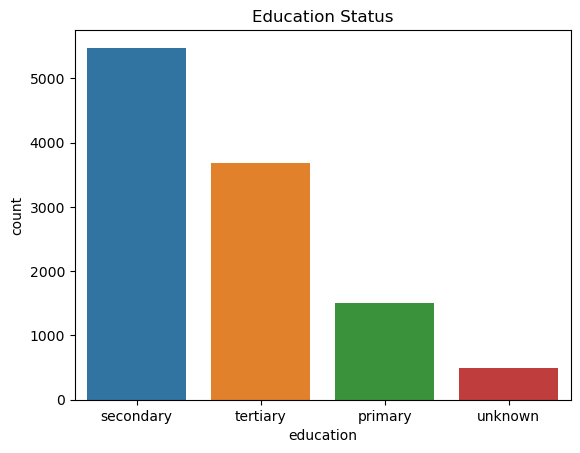

In [255]:
sns.countplot(x='education',data=data)
plt.title("Education Status")

In [256]:
data.loan.value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

# Loan Status

<Axes: xlabel='loan', ylabel='count'>

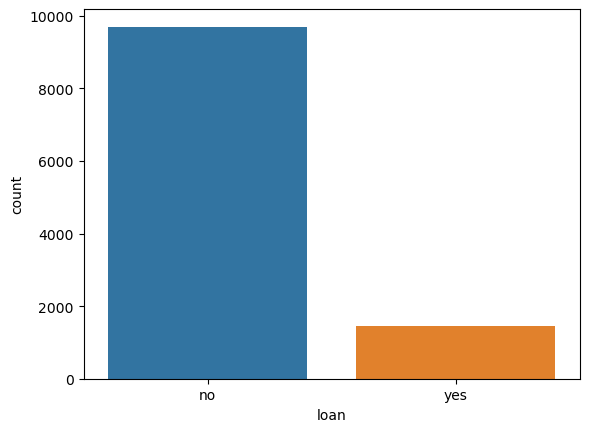

In [257]:
sns.countplot(x='loan',data=data)

In [258]:
data.housing.value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

# Housing Status

<Axes: xlabel='housing', ylabel='count'>

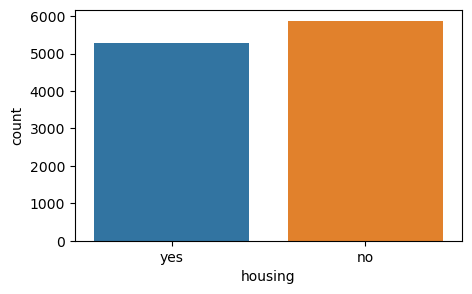

In [259]:
plt.figure(figsize = (5,3))
sns.countplot(x='housing',data=data)

# No Loan  and No Housing loan clients

In [260]:
data['No loan']=0

In [261]:
le=LabelEncoder()
data["loan"] = le.fit_transform(data["loan"])
data["housing"]=le.fit_transform(data["housing"])

In [262]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,No loan
0,59,admin.,married,secondary,no,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,yes,0
1,56,admin.,married,secondary,no,45,0,0,unknown,5,may,1467,1,-1,0,unknown,yes,0
2,41,technician,married,secondary,no,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,yes,0
3,55,services,married,secondary,no,2476,1,0,unknown,5,may,579,1,-1,0,unknown,yes,0
4,54,admin.,married,tertiary,no,184,0,0,unknown,5,may,673,2,-1,0,unknown,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,1,0,cellular,20,apr,257,1,-1,0,unknown,no,0
11158,39,services,married,secondary,no,733,0,0,unknown,16,jun,83,4,-1,0,unknown,no,0
11159,32,technician,single,secondary,no,29,0,0,cellular,19,aug,156,2,-1,0,unknown,no,0
11160,43,technician,married,secondary,no,0,0,1,cellular,8,may,9,2,172,5,failure,no,0


In [263]:
data['No loan']=data['loan']+data['housing']
data['No loan']=data['No loan']==0

In [264]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,No loan
0,59,admin.,married,secondary,no,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,yes,False
1,56,admin.,married,secondary,no,45,0,0,unknown,5,may,1467,1,-1,0,unknown,yes,True
2,41,technician,married,secondary,no,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,yes,False
3,55,services,married,secondary,no,2476,1,0,unknown,5,may,579,1,-1,0,unknown,yes,False
4,54,admin.,married,tertiary,no,184,0,0,unknown,5,may,673,2,-1,0,unknown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,1,0,cellular,20,apr,257,1,-1,0,unknown,no,False
11158,39,services,married,secondary,no,733,0,0,unknown,16,jun,83,4,-1,0,unknown,no,True
11159,32,technician,single,secondary,no,29,0,0,cellular,19,aug,156,2,-1,0,unknown,no,True
11160,43,technician,married,secondary,no,0,0,1,cellular,8,may,9,2,172,5,failure,no,False


# Status of Client with No Loan and No Housing loan

<Axes: xlabel='No loan', ylabel='count'>

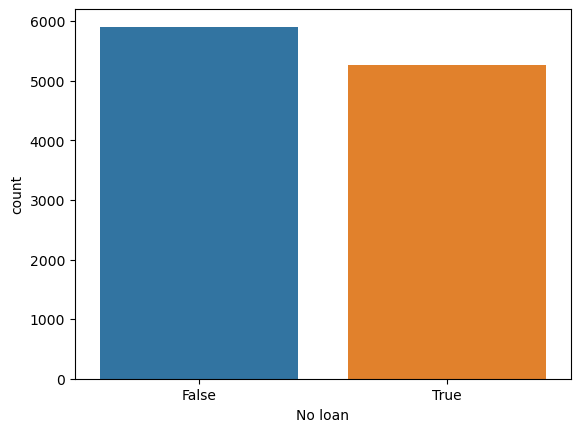

In [265]:
sns.countplot(x='No loan',data=data)

# Clients with Both Housing and Loan

In [266]:
data['housing&loan']=0

In [267]:
data['housing&loan']=data['loan']+data['housing']
data['housing&loan']=data['housing&loan']==2

In [268]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,No loan,housing&loan
0,59,admin.,married,secondary,no,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,yes,False,False
1,56,admin.,married,secondary,no,45,0,0,unknown,5,may,1467,1,-1,0,unknown,yes,True,False
2,41,technician,married,secondary,no,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,yes,False,False
3,55,services,married,secondary,no,2476,1,0,unknown,5,may,579,1,-1,0,unknown,yes,False,False
4,54,admin.,married,tertiary,no,184,0,0,unknown,5,may,673,2,-1,0,unknown,yes,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,1,0,cellular,20,apr,257,1,-1,0,unknown,no,False,False
11158,39,services,married,secondary,no,733,0,0,unknown,16,jun,83,4,-1,0,unknown,no,True,False
11159,32,technician,single,secondary,no,29,0,0,cellular,19,aug,156,2,-1,0,unknown,no,True,False
11160,43,technician,married,secondary,no,0,0,1,cellular,8,may,9,2,172,5,failure,no,False,False


In [269]:
data["housing&loan"].value_counts()

False    10327
True       835
Name: housing&loan, dtype: int64

<Axes: xlabel='housing&loan', ylabel='count'>

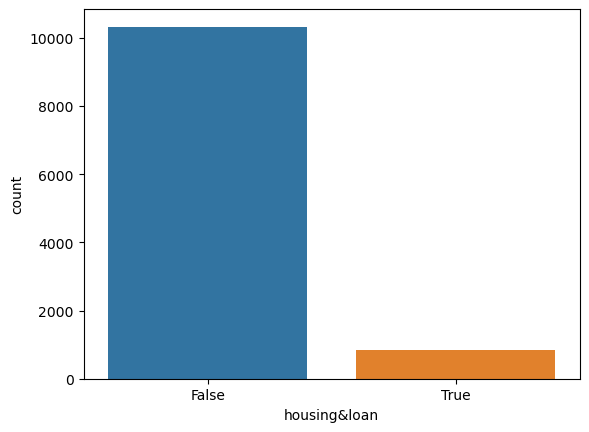

In [270]:
sns.countplot(x='housing&loan',data=data)

In [271]:
data.deposit.value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

# Deposit Status

Text(0.5, 0, 'Term_Deposit')

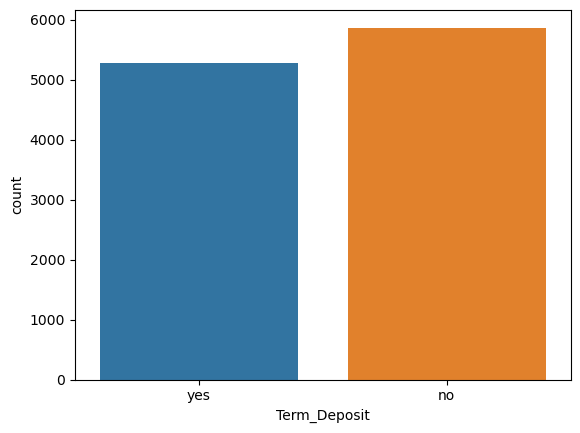

In [272]:
sns.countplot(x='deposit',data=data)
plt.xlabel('Term_Deposit')

In [273]:
data.default.value_counts()

no     10994
yes      168
Name: default, dtype: int64

# Default Status

<Axes: xlabel='default', ylabel='count'>

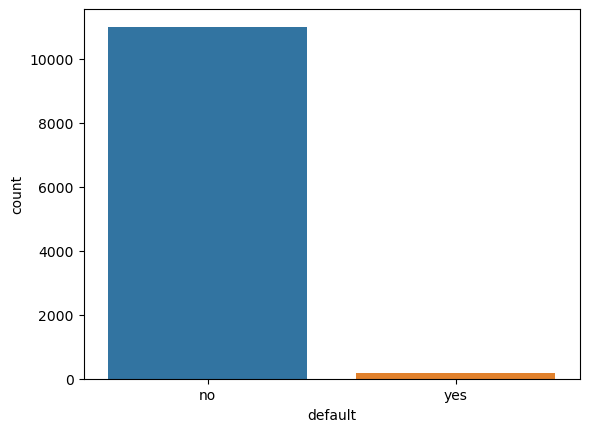

In [274]:
sns.countplot(x='default',data=data)

In [275]:
data.contact.value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

# Contact Status

<Axes: xlabel='contact', ylabel='count'>

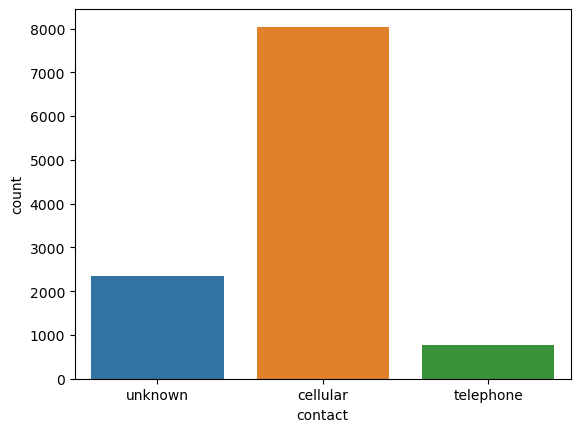

In [276]:
sns.countplot(x='contact',data=data)

In [277]:
data.campaign.value_counts()

1     4798
2     3028
3     1321
4      771
5      378
6      265
7      139
8      128
9       72
10      52
11      40
13      30
12      29
14      15
17      14
15      13
16       9
18       8
21       8
20       5
19       5
24       5
22       4
30       4
23       3
25       3
26       3
32       2
43       2
29       2
33       1
28       1
41       1
27       1
63       1
31       1
Name: campaign, dtype: int64

# Campaign Status

<Axes: xlabel='campaign', ylabel='count'>

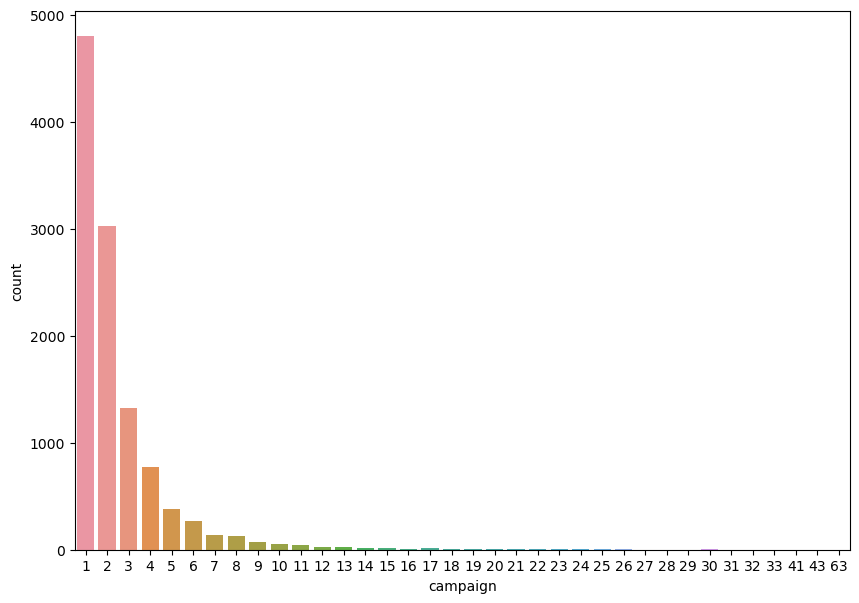

In [278]:
plt.figure(figsize=(10,7))
sns.countplot(x='campaign',data=data)

# Age Distribution

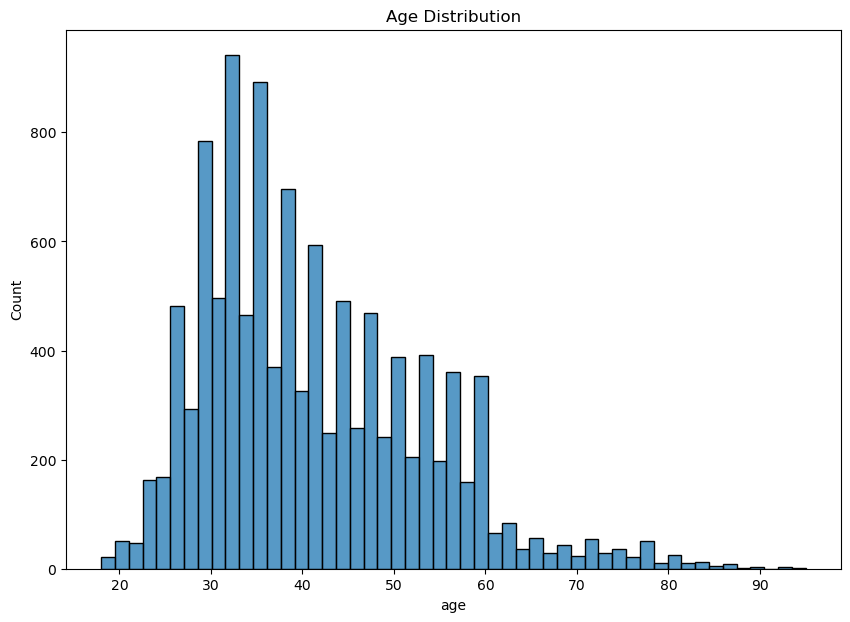

In [279]:
plt.figure(figsize=(10,7))
sns.histplot(data['age'])
plt.title("Age Distribution")
plt.show()

# Income group is created based on Clients income

In [280]:
data['Income group']=pd.cut(data['balance'],bins=[-15000,500,1500,72000],labels=['Low','Mid','High'])

In [281]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,No loan,housing&loan,Income group
0,59,admin.,married,secondary,no,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,yes,False,False,High
1,56,admin.,married,secondary,no,45,0,0,unknown,5,may,1467,1,-1,0,unknown,yes,True,False,Low
2,41,technician,married,secondary,no,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,yes,False,False,Mid
3,55,services,married,secondary,no,2476,1,0,unknown,5,may,579,1,-1,0,unknown,yes,False,False,High
4,54,admin.,married,tertiary,no,184,0,0,unknown,5,may,673,2,-1,0,unknown,yes,True,False,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,1,0,cellular,20,apr,257,1,-1,0,unknown,no,False,False,Low
11158,39,services,married,secondary,no,733,0,0,unknown,16,jun,83,4,-1,0,unknown,no,True,False,Mid
11159,32,technician,single,secondary,no,29,0,0,cellular,19,aug,156,2,-1,0,unknown,no,True,False,Low
11160,43,technician,married,secondary,no,0,0,1,cellular,8,may,9,2,172,5,failure,no,False,False,Low


In [282]:
data.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
deposit         0
No loan         0
housing&loan    0
Income group    2
dtype: int64

In [283]:
data["Income group"].value_counts()

Low     5349
High    3106
Mid     2705
Name: Income group, dtype: int64

# Income group Representation of Clients

<Axes: xlabel='Income group', ylabel='count'>

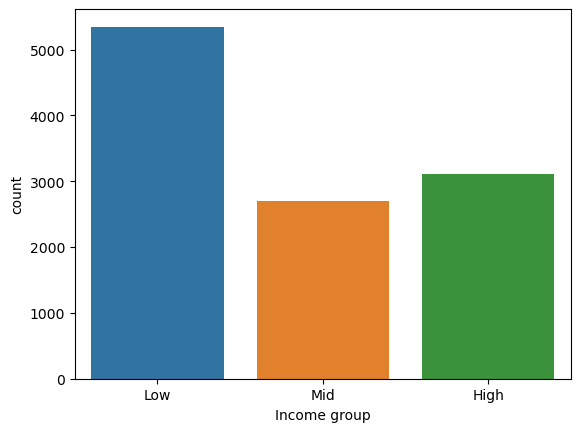

In [284]:
sns.countplot(x='Income group',data=data)

# Decision Tree Classifier Model

In [285]:
data.drop(['pdays','previous','poutcome','deposit','Income group','No loan','housing&loan'],axis=1 , inplace=True)

In [286]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,59,admin.,married,secondary,no,2343,1,0,unknown,5,may,1042,1
1,56,admin.,married,secondary,no,45,0,0,unknown,5,may,1467,1
2,41,technician,married,secondary,no,1270,1,0,unknown,5,may,1389,1
3,55,services,married,secondary,no,2476,1,0,unknown,5,may,579,1
4,54,admin.,married,tertiary,no,184,0,0,unknown,5,may,673,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,1,0,cellular,20,apr,257,1
11158,39,services,married,secondary,no,733,0,0,unknown,16,jun,83,4
11159,32,technician,single,secondary,no,29,0,0,cellular,19,aug,156,2
11160,43,technician,married,secondary,no,0,0,1,cellular,8,may,9,2


In [287]:
le=LabelEncoder()

In [288]:
data["job"] = le.fit_transform(data["job"])
data["marital"] = le.fit_transform(data["marital"])
data["education"] = le.fit_transform(data["education"])
data["default"] = le.fit_transform(data["default"])
data["contact"] = le.fit_transform(data["contact"])
data["month"] = le.fit_transform(data["month"])

In [289]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2


In [290]:
x=data.drop('default',axis=1)
y=data['default']

In [291]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [292]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [293]:
dtc_pred=dtc.predict(x_test)

# Classification Report of DTC Model

In [294]:
print(classification_report(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3306
           1       0.05      0.09      0.07        43

    accuracy                           0.97      3349
   macro avg       0.52      0.54      0.53      3349
weighted avg       0.98      0.97      0.97      3349



# Accuracy of DTC Model

In [295]:
score=round(dtc.score(x_train,y_train)*100)
print("Accuracy Score:",round(score),"%")

Accuracy Score: 100 %


# Confusion Matrix

In [296]:
cm = confusion_matrix(dtc_pred,y_test)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[3236   39]
 [  70    4]]
